In [76]:
import numpy as np
import  matplotlib.pyplot as plt


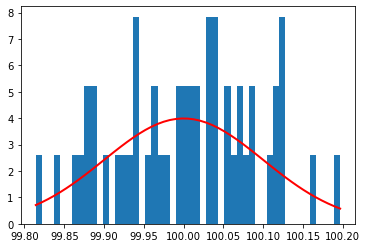

In [161]:
mu, sigma, size = 100, 0.1, (50,2) # mean and standard deviation and size
s = np.random.normal(mu, sigma, size)

count, bins, ignored = plt.hist(s,50, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=2, color='r')


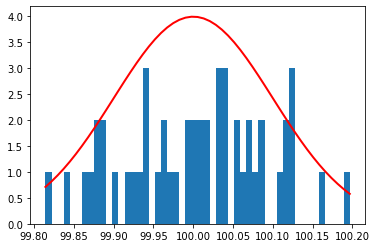

In [162]:
count, bins, ignored = plt.hist(s,50, density=False)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=2, color='r')




In [163]:
# Using a standard Gaussian function, use kernel density estimation to estimate the probability distribution.
# How does using different values of h compare to using a different number of bins for your
# histogram?

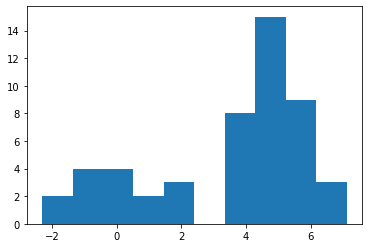

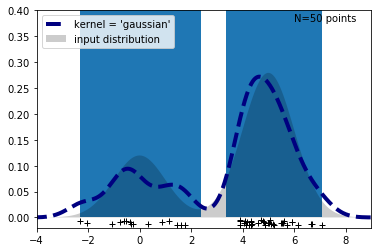

In [210]:
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

N = 50
np.random.seed(1)

X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]

X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]
#The newaxis object can be used in all slicing operations to create an axis of length one. 
# newaxis is an alias for ‘None’, and ‘None’ can be used in place of this with the same result.

true_dens = (0.3 * norm(0, 1).pdf(X_plot[:, 0])
             + 0.7 * norm(5, 1).pdf(X_plot[:, 0]))
#plt.hist(X_plot,30, )
plt.hist(X)
fig, ax = plt.subplots()
plt.hist(X)
ax.fill(X_plot[:, 0], true_dens, fc='black', alpha=0.2,
        label='input distribution')
colors = ['navy', 'cornflowerblue', 'darkorange']
#kernels = ['gaussian', 'tophat', 'epanechnikov']
kernels = ['gaussian']
lw = 4 #linewidth (Kalınlık)
for color, kernel in zip(colors, kernels):
    kde = KernelDensity(kernel=kernel, bandwidth=0.58).fit(X)
    #Evaluate the log density model on the data:
    log_dens = kde.score_samples(X_plot)
    ax.plot(X_plot[:, 0], np.exp(log_dens), color=color, lw=lw,
            linestyle='dashed', label="kernel = '{0}'".format(kernel))


#Plotu şekillendirme:
ax.text(6, 0.38, "N={0} points".format(N))

ax.legend(loc='upper left')
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')

ax.set_xlim(-4, 9)
ax.set_ylim(-0.02, 0.4)
plt.show()

In [207]:
x=1;
b=0.01;

J1 = 2*pow(x+b,3)+2
J2 = 2*pow(x-b,3)+2

J= (J1-J2)/(2*b)
print(J)

6.000200000000011
